In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import plotly.express as px

In [3]:
df = pd.read_csv("/content/amazon_alexa.tsv",sep="\t")

In [4]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,3150.0,4.463175,1.068506,1.0,4.0,5.0,5.0,5.0
feedback,3150.0,0.918413,0.273778,0.0,1.0,1.0,1.0,1.0


In [7]:
df["feedback"].unique()

array([1, 0])

In [8]:
df["rating"].unique()

array([5, 4, 3, 2, 1])

In [9]:
df["variation"].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [10]:
df.head(2)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1


In [11]:
import seaborn as sns

<ipython-input-12-88ffc29a586f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_distribution.keys()),


<Axes: title={'center': 'Rating Distributions'}>

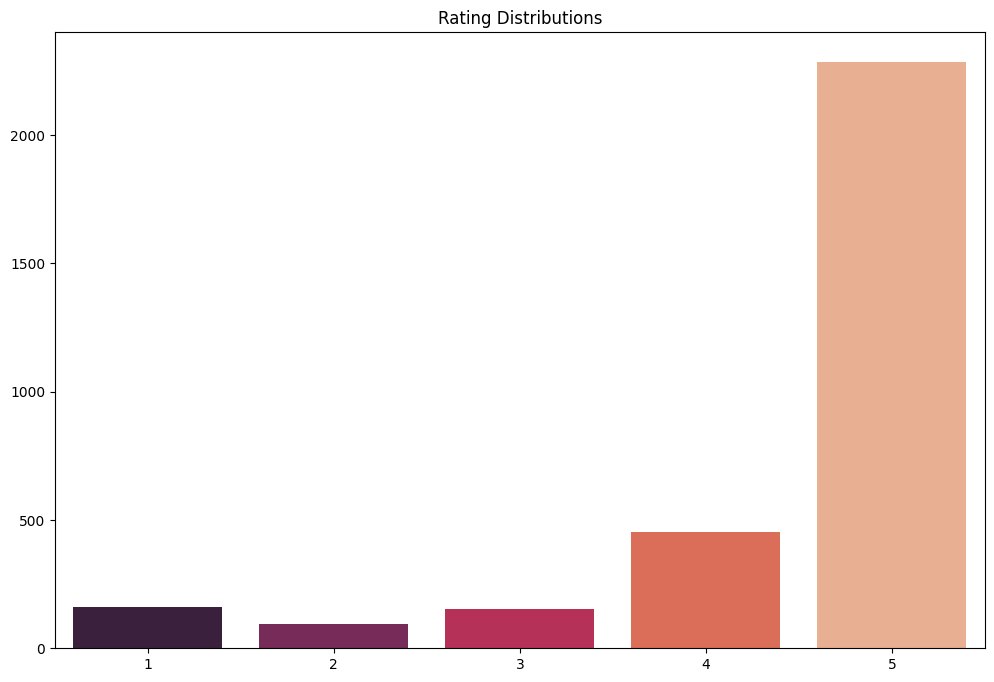

In [12]:
plt.figure(figsize=(12,8))
plt.title("Rating Distributions")
train_distribution = df['rating'].value_counts().sort_values()


sns.barplot(x=list(train_distribution.keys()),
            y=train_distribution.values,palette='rocket')

<ipython-input-13-95d530986a76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_distribution.keys()),


<Axes: title={'center': 'Feedback'}>

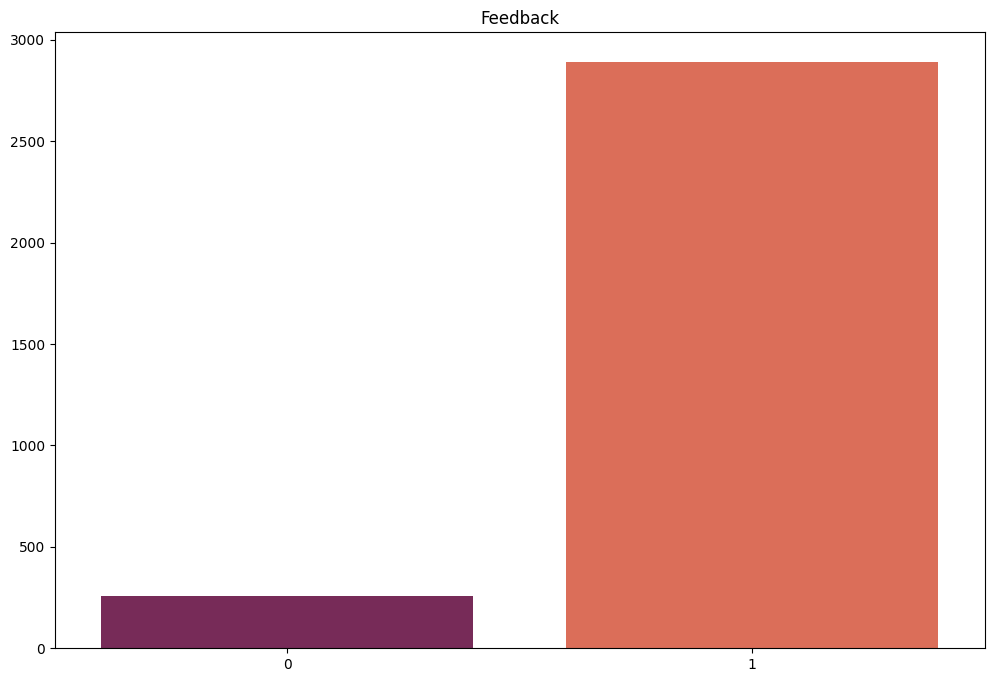

In [13]:
plt.figure(figsize=(12,8))
plt.title("Feedback")
train_distribution = df['feedback'].value_counts().sort_values()


sns.barplot(x=list(train_distribution.keys()),
            y=train_distribution.values,palette='rocket')

<ipython-input-14-1dc2dc971780>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_distribution.keys()),


<Axes: title={'center': 'Variation Distribution'}>

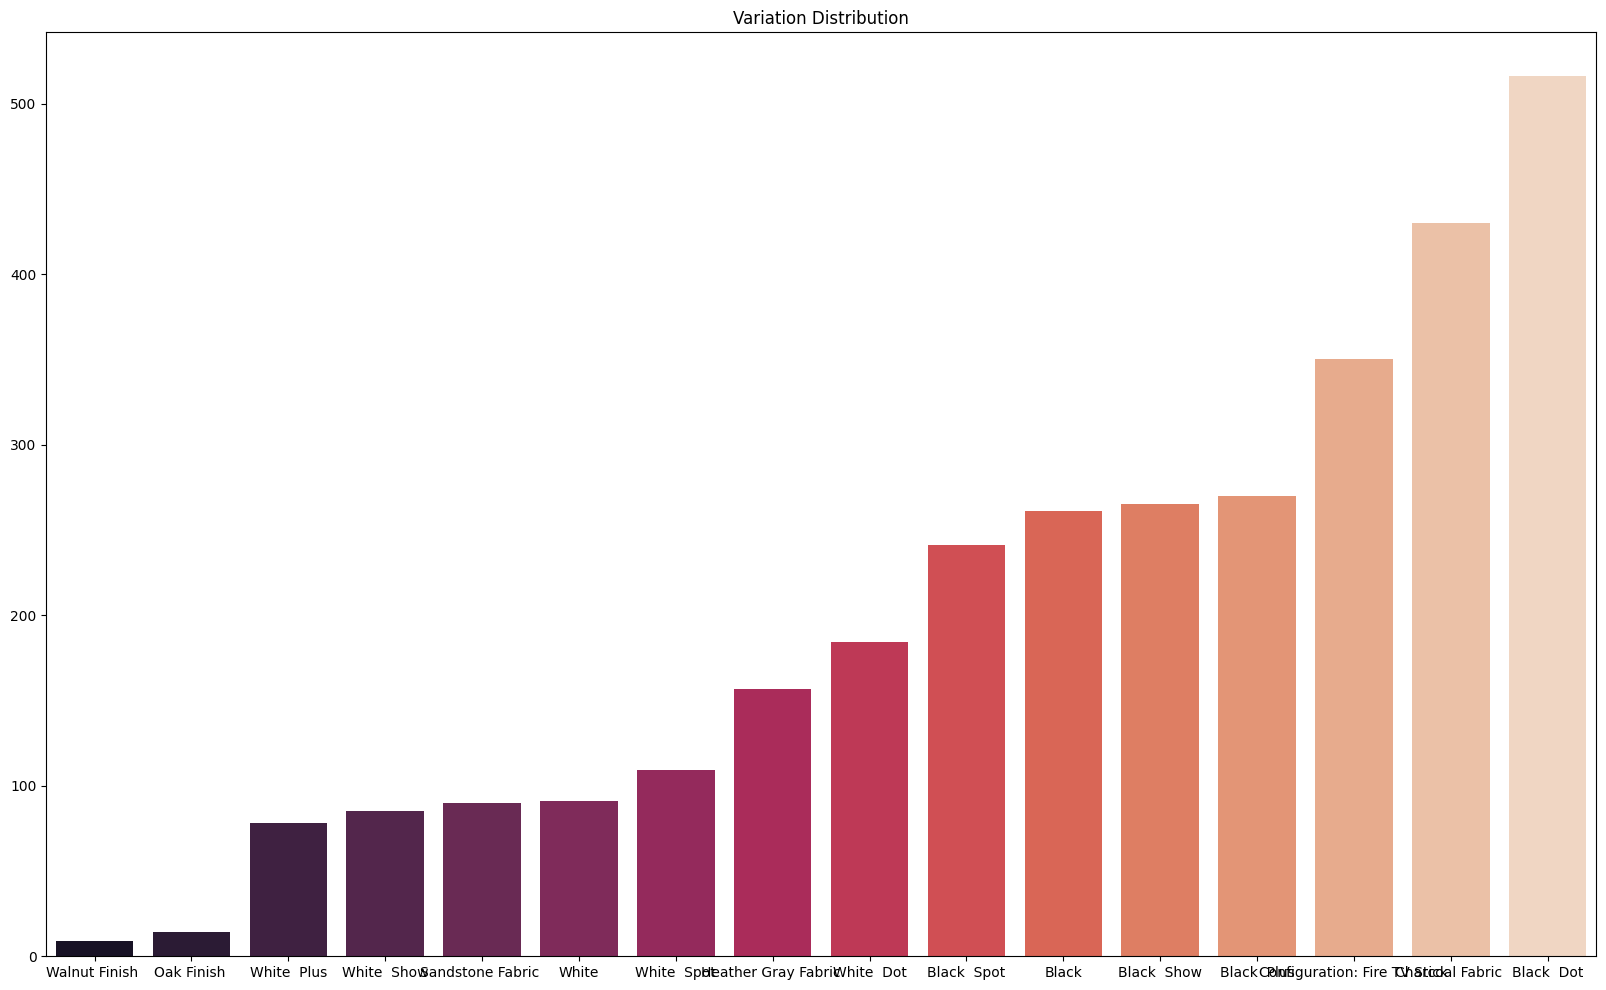

In [14]:
plt.figure(figsize=(20,12))
plt.title("Variation Distribution")
train_distribution = df['variation'].value_counts().sort_values()


sns.barplot(x=list(train_distribution.keys()),
            y=train_distribution.values,palette='rocket')

In [15]:

!pip install wordcloud

In [17]:
from wordcloud import WordCloud

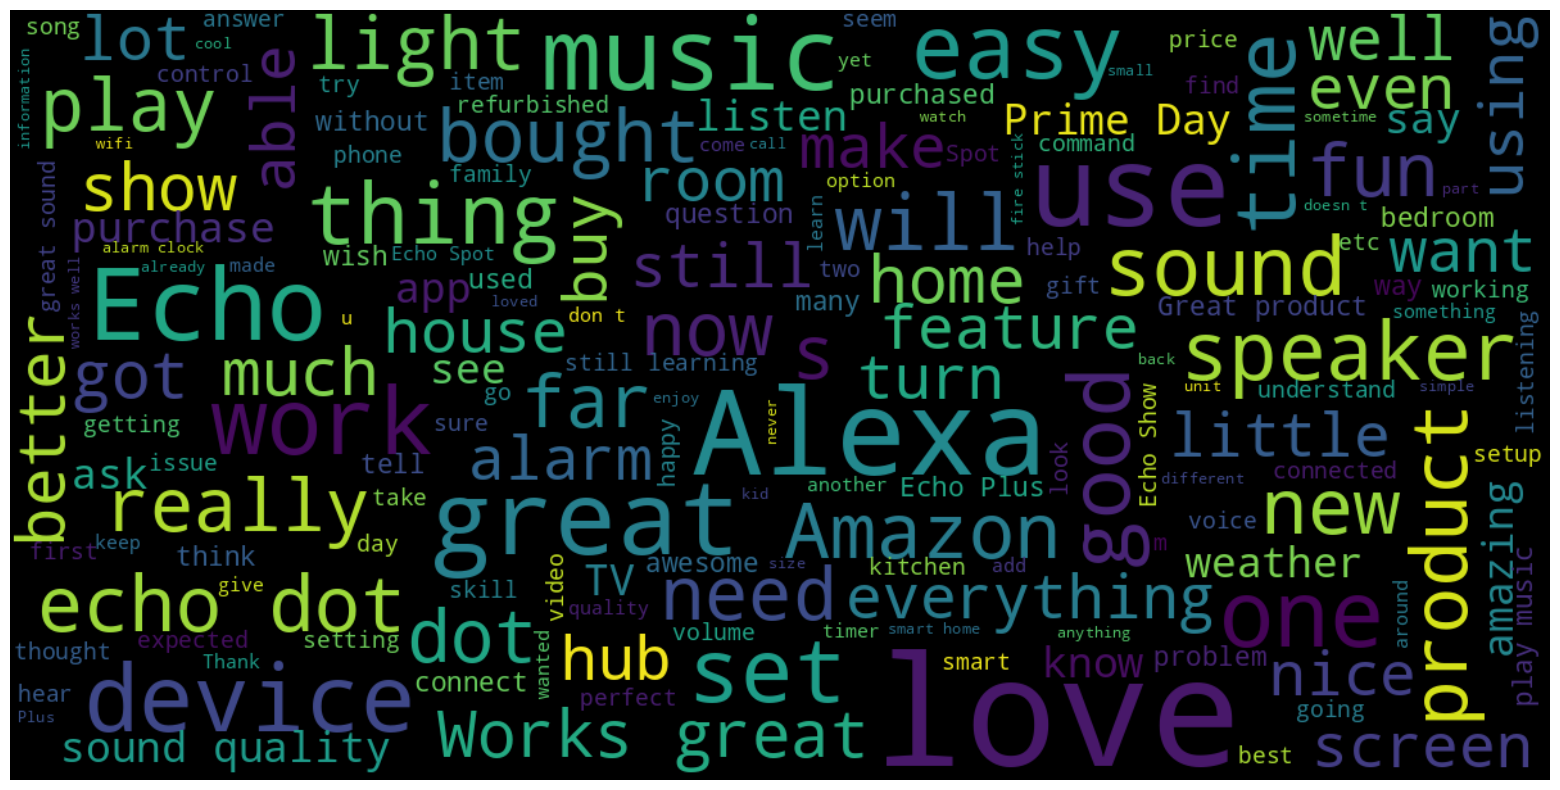

In [18]:
reviews = ' '.join(map(str, df['verified_reviews']))
wordcloud = WordCloud(
        background_color='black',

        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    )
wordcloud.generate(str(reviews))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [19]:
review_text = df.drop(['rating','date','variation','feedback'],axis=1)
review_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [20]:
df["review_lower"] = review_text.apply(lambda x: x.astype(str).str.lower())
df["review_lower"]

,review_lower
0,love my echo!
1,loved it!
2,"sometimes while playing a game, you can answer..."
3,i have had a lot of fun with this thing. my 4 ...
4,music
...,...
3145,"perfect for kids, adults and everyone in betwe..."
3146,"listening to music, searching locations, check..."
3147,"i do love these things, i have them running my..."
3148,only complaint i have is that the sound qualit...


In [21]:
import string

In [22]:
def remove_puntuations(text):
    no_puntuations ="".join([char for char in text if text if char not in string.punctuation])
    return no_puntuations
df["no_puntuation"] = df["review_lower"].apply(lambda x: remove_puntuations(x))
df["no_puntuation"]

,no_puntuation
0,love my echo
1,loved it
2,sometimes while playing a game you can answer ...
3,i have had a lot of fun with this thing my 4 y...
4,music
...,...
3145,perfect for kids adults and everyone in between
3146,listening to music searching locations checkin...
3147,i do love these things i have them running my ...
3148,only complaint i have is that the sound qualit...


In [23]:
def remove_emoji(string):
    import re
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['review_noemoji'] = df['no_puntuation'].apply(lambda x: remove_emoji(x))
df['review_noemoji']

,review_noemoji
0,love my echo
1,loved it
2,sometimes while playing a game you can answer ...
3,i have had a lot of fun with this thing my 4 y...
4,music
...,...
3145,perfect for kids adults and everyone in between
3146,listening to music searching locations checkin...
3147,i do love these things i have them running my ...
3148,only complaint i have is that the sound qualit...


In [24]:
import re

In [25]:
EMOTICONS=[':-<',':->']
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df["review_emoticons"]= df['review_noemoji'].apply(lambda x: remove_emoticons(x))
df["review_emoticons"]

,review_emoticons
0,love my echo
1,loved it
2,sometimes while playing a game you can answer ...
3,i have had a lot of fun with this thing my 4 y...
4,music
...,...
3145,perfect for kids adults and everyone in between
3146,listening to music searching locations checkin...
3147,i do love these things i have them running my ...
3148,only complaint i have is that the sound qualit...


In [26]:
import spacy

In [27]:
nlp = spacy.load("en_core_web_sm")
reviews = ' '.join(map(str, df['review_emoticons']))
doc = nlp(reviews)
for token in doc:
    print(token.text)

Streaming output truncated to the last 5000 lines.
sister
the
echo
only
smaller
with
slightly
less
audio
fidelity
but
much
lower
price
on
amazon
prime
dayused
in
another
room
to
add
alexa
to
an
additional
room
it
does
everything
 
the
big
guy
does
great
product
 
understands
my
accent
love
it
ca
nt
stop
using
it
really
like
the
availability
to
get
instant
music
throughout
the
house
  
very
handy
in
the
kitchen
sets
timer
and
gives
me
extra
help
on
setting
oven
temps
cool
little
speakeri
love
her
alarms
and
connected
it
to
my
speakers
and
it
sounds
great
it
is
s
great
tool
helping
with
information
used
twice
not
working
awesome
piece
of
technology
that
has
simplified
my
life
great
purchase
i
jumped
on
the
bandwagon
by
purchasing
an
echo
 
i
feel
like
there
was
a
struggle
getting
connected
and
then
three
days
later
the
device
is
sharing
news
and
weather
 
now
we
use
it
some
but
have
not
tapped
in
to
all
options
 
still
testing
it
out
love
alexa
love
the
echo
dot
but
we
have
trouble
with


In [28]:
nlp = spacy.load("en_core_web_sm")
reviews = ' '.join(map(str, df['review_emoticons']))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Streaming output truncated to the last 5000 lines.
sister sister NOUN NN pobj xxxx True False
the the DET DT det xxx True True
echo echo NOUN NN appos xxxx True False
only only ADV RB advmod xxxx True True
smaller small ADJ JJR amod xxxx True False
with with ADP IN prep xxxx True True
slightly slightly ADV RB advmod xxxx True False
less less ADV RBR advmod xxxx True True
audio audio ADJ JJ amod xxxx True False
fidelity fidelity NOUN NN pobj xxxx True False
but but CCONJ CC cc xxx True True
much much ADV RB advmod xxxx True True
lower low ADJ JJR amod xxxx True False
price price NOUN NN appos xxxx True False
on on ADP IN prep xx True True
amazon amazon PROPN NNP compound xxxx True False
prime prime PROPN NNP appos xxxx True False
dayused dayuse VERB VBN advcl xxxx True False
in in ADP IN prep xx True True
another another DET DT det xxxx True True
room room NOUN NN pobj xxxx True False
to to PART TO aux xx True True
add add VERB VB advcl xxx True False
alexa alexa ADJ JJ dobj xxxx True F

In [29]:
nlp = spacy.load("en_core_web_sm")
reviews = ' '.join(map(str, df['review_emoticons']))


for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

4 258 259 CARDINAL
5th 936 939 ORDINAL
85 year old 1270 1281 DATE
a couple of days 1925 1941 DATE
2nd 2129 2132 ORDINAL
every morning 3028 3041 TIME
a few days 3263 3273 DATE
second 3511 3517 ORDINAL
1st 3664 3667 ORDINAL
tasha 4189 4194 GPE
two 4364 4367 CARDINAL
3 4400 4401 CARDINAL
first 4657 4662 ORDINAL
first 4782 4787 ORDINAL
1st 5081 5084 ORDINAL
one 5140 5143 CARDINAL
first 5187 5192 ORDINAL
prime day 5289 5298 DATE
first 5387 5392 ORDINAL
10 5590 5592 CARDINAL
jimmy buffet 6110 6122 PERSON
prime day 6285 6294 DATE
3 6547 6548 CARDINAL
7000 6831 6835 CARDINAL
2nd 6882 6885 DATE
83 7269 7271 DATE
nana 7997 8001 ORG
34smart34 8104 8113 DATE
the other day 8737 8750 DATE
first 9284 9289 ORDINAL
2nd 9686 9689 ORDINAL
another cent 9918 9930 MONEY
1 9960 9961 CARDINAL
2 9977 9978 CARDINAL
an hour 12286 12293 TIME
1 12332 12333 CARDINAL
a million 12702 12711 CARDINAL
italian 12762 12769 NORP
songs34 12770 12777 PERSON
5 13116 13117 CARDINAL
45 13139 13141 CARDINAL
5 13149 13150 CARDINA

In [30]:
 from nltk.stem import *

In [32]:
def stemming(content, stemmer):
    # Remove non-alphabetical characters
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)

    # Convert sentences into lowercase sentences and split each into words
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()

    # Prepare stop words
    stop_words = set(stopwords.words('english'))
    # Stem words and remove stop words
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if word not in stop_words]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [33]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()


df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x, ps,stop_words=True))


TypeError: stemming() got an unexpected keyword argument 'stop_words'